In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv("dataset.csv")

# Contoh kolom (sesuaikan jika nama berbeda)
# date | pm25 | temperature
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

x_data = df['pollution'].values.reshape(-1,1)
y_data = df['temp'].values.reshape(-1,1)

# Normalisasi agar stabil
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

x_norm = scaler_x.fit_transform(x_data).flatten()
y_norm = scaler_y.fit_transform(y_data).flatten()

def lotka_volterra(t, z, alpha, beta, delta, gamma):
    x, y = z
    dxdt = alpha*x - beta*x*y
    dydt = delta*x*y - gamma*y
    return [dxdt, dydt]

# Estimasi awal dari data
x0 = x_norm[0]
y0 = y_norm[0]
initial_state = [x0, y0]

alpha = 0.8     # akumulasi polusi
beta  = 1.2     # pengaruh cuaca terhadap polusi
delta = 0.6     # dampak polusi ke cuaca
gamma = 0.9     # pelemahan cuaca

t_span = (0, len(x_norm))
t_eval = np.linspace(0, len(x_norm), len(x_norm))

sol = solve_ivp(
    lotka_volterra,
    t_span,
    initial_state,
    args=(alpha, beta, delta, gamma),
    t_eval=t_eval
)

x_sim = sol.y[0]
y_sim = sol.y[1]


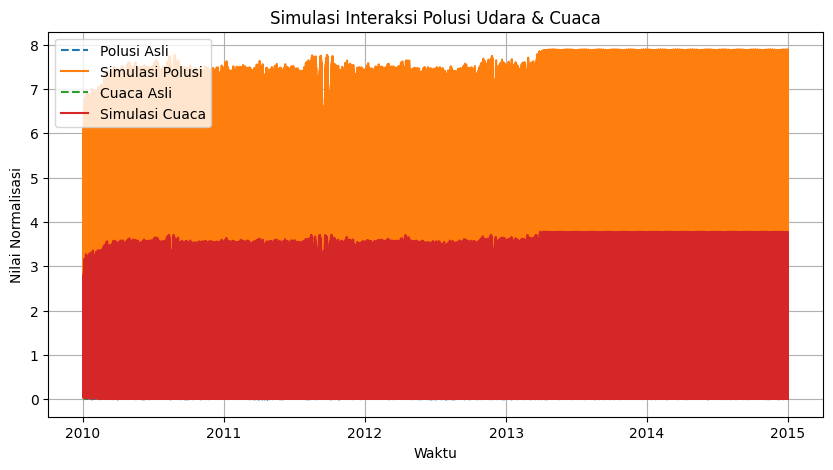

In [9]:
plt.figure(figsize=(10,5))
plt.plot(df['date'], x_norm, '--', label='Polusi Asli')
plt.plot(df['date'], x_sim, label='Simulasi Polusi')

plt.plot(df['date'], y_norm, '--', label='Cuaca Asli')
plt.plot(df['date'], y_sim, label='Simulasi Cuaca')

plt.title("Simulasi Interaksi Polusi Udara & Cuaca")
plt.xlabel("Waktu")
plt.ylabel("Nilai Normalisasi")
plt.legend()
plt.grid(True)
plt.show()

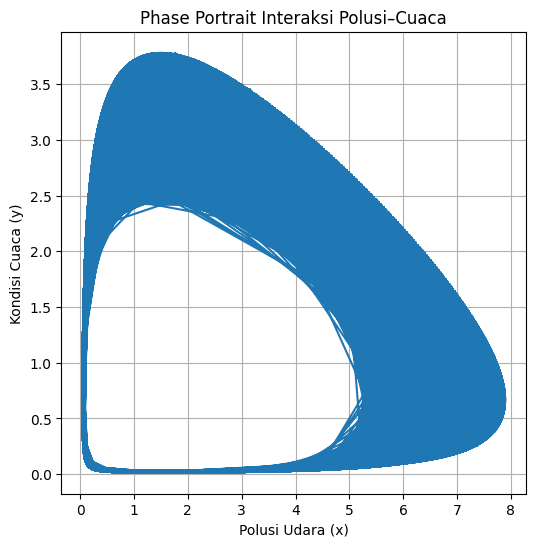

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(x_sim, y_sim)
plt.xlabel("Polusi Udara (x)")
plt.ylabel("Kondisi Cuaca (y)")
plt.title("Phase Portrait Interaksi Polusi–Cuaca")
plt.grid(True)
plt.show()